In [1]:
import subprocess as sp
import matplotlib.pyplot as plt

from __init__ import *
from snmcseq_utils import create_logger
from snmcseq_utils import cd

In [2]:
log = create_logger()
log.info('.')

08/10/2018 11:10:22 AM .


In [67]:
# dataset = 'CEMBA_4C_180417'
dataset = 'CEMBA_4C_180419'
path_dataset = os.path.join(PATH_DATASETS, dataset)

# Gzip to bgzip

In [ ]:
# make allc folder and symlic from from_ecker_lab

os.makedirs(os.path.join(path_dataset, 'allc'))

## Case 1

In [5]:
# allc_folders = glob.glob(os.path.join(path_dataset, 'from_ecker_lab', '*'))

# should be parallelized in the future
# for i, allc_folder in enumerate(allc_folders):
data_folder = os.path.join(PATH_DATASETS, dataset, 'from_ecker_lab')
with cd(data_folder):
    allc_files = glob.glob('allc_*.tsv.gz')
    allc_files = glob.glob('allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.gz')
    for i, allc_file in enumerate(allc_files):
        # if src == 'allc_180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_1_CEMBA180104_4B_2_H8_AD002_indexed.tsv.gz':
        
        src = allc_file
        
        dst = os.path.join(path_dataset, 'allc', src)
        dst = (os.path.splitext(dst)[0] +'.bgz')

        logging.info("gzip to bgzip ({}/{}): {}".format(i+1, len(allc_files), src))
        
        # .tsv.gz to .tsv 
        cmd = 'gzip -cd {} > {}'.format(src, os.path.splitext(src)[0]) 
        os.system(cmd)

        # bgzip
        cmd = 'bgzip -c {} > {}'.format(os.path.splitext(src)[0], dst) 
        os.system(cmd)

        # rm tmp files
        os.remove(os.path.splitext(src)[0])

03/18/2018 08:48:27 PM gzip to bgzip (1/1): allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.gz


## Case 2

In [ ]:
allc_folders = glob.glob(os.path.join(path_dataset, 'from_ecker_lab', '*'))
# should be parallelized in the future
for i, allc_folder in enumerate(allc_folders):
    with cd(allc_folder):
        allc_files = glob.glob('allc_*.tsv.gz')
        assert len(allc_files) == 1
        src = allc_files[0]
    
        # if src == 'allc_180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_1_CEMBA180104_4B_2_H8_AD002_indexed.tsv.gz':
        dst = os.path.join(path_dataset, 'allc', src)
        dst = (os.path.splitext(dst)[0] +'.bgz')

        logging.info("gzip to bgzip ({}/{}): {}".format(i+1, len(allc_folders), src))
        # .tsv.gz to .tsv 
        cmd = 'gzip -cd {} > {}'.format(src, os.path.splitext(src)[0]) 
        os.system(cmd)

        # bgzip
        cmd = 'bgzip -c {} > {}'.format(os.path.splitext(src)[0], dst) 
        os.system(cmd)

        # rm tmp files
        os.remove(os.path.splitext(src)[0])


# Tabix index

In [11]:
# try tabix (could be parallelized)
with cd(os.path.join(path_dataset, 'allc')):
    allc_files = glob.glob(os.path.join(path_dataset, 'allc', '*'))
    allc_files = glob.glob(os.path.join(path_dataset, 'allc', 'allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.bgz'))
    for i, allc_file in enumerate(allc_files):
        os.system('tabix -f -s 1 -b 2 -e 2 -S 0 ' + allc_file) 
        logging.info("Done tabix indexing ({}/{}): {}".format(i+1, len(allc_files), allc_file))

FileNotFoundError: [Errno 2] No such file or directory: '/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/CEMBA_3A_180129/allc'

# Mapping summary

In [68]:
# mapping summary
f = os.path.join(PATH_REFERENCES, 'Mapping_summary', 'CEMBA_4C_summary.txt')
df = pd.read_table(f) 
# filter

# df['dataset'] = df['Sample'].apply(lambda x: '_'.join(['CEMBA', 
#                                        x.split('_')[7],
#                                        x.split('_')[6][len('CEMBA'):]]
#                                                      ))
# dataset_rep = '_'.join(dataset.split('_')[:3])
# df = df[df['dataset']==dataset_rep].drop('dataset', axis=1)

# filter
f = '/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/{}/allc/*.tsv.bgz'.format(dataset)
cells = [os.path.basename(allc)[5:-8] for allc in glob.glob(f)]
df = df[df['Sample'].isin(cells)]

print(df.shape)
df.head()

(1005, 15)


,Sample,Total reads,Mapped reads,Mapping rate,Nonclonal reads,% Nonclonal rate,Filtered reads,Filtered rate,Lambda mC/C,mCCC/CCC,mCG/CG,mCH/CH,Estimated mCG/CG,Estimated mCH/CH,% Genome covered
1050,180605_CEMBA_mm_P56_P63_4C_CEMBA180419_4C_5_CE...,3955748,2750007,0.695,2030844,0.738,1854292,0.913,NaN,0.00471,0.81132,0.02267,0.81043,0.01804,7.77
1051,180605_CEMBA_mm_P56_P63_4C_CEMBA180419_4C_5_CE...,3633036,2549859,0.702,1896832,0.744,1719007,0.906,NaN,0.00518,0.73957,0.02463,0.73821,0.01955,7.23
1052,180605_CEMBA_mm_P56_P63_4C_CEMBA180419_4C_5_CE...,4312100,2998803,0.695,2217200,0.739,1998326,0.901,NaN,0.00682,0.80824,0.03693,0.80692,0.03032,8.34
1053,180605_CEMBA_mm_P56_P63_4C_CEMBA180419_4C_5_CE...,4276852,2936751,0.687,2180687,0.743,1957187,0.898,NaN,0.00479,0.77326,0.02074,0.77217,0.01603,8.16
1054,180605_CEMBA_mm_P56_P63_4C_CEMBA180419_4C_5_CE...,3456400,2386370,0.690,1770307,0.742,1573814,0.889,0.0,0.00462,0.76938,0.02084,0.76831,0.01630,6.62


In [69]:
# move allc inplace

# dst = '/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/{}/from_ecker_lab'.format(dataset)
# if not os.path.isdir(dst):
#     os.makedirs(dst)
    
# with cd('/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/3F/from_ecker_lab'):
#     dirs = [dirc for dirc in sorted(glob.glob('*')) if os.path.isdir(dirc)]
#     for dirc in dirs:
#         if dirc[:-len('_bismark')] in df['Sample'].tolist():
#             print(dirc)
#             cmd = 'mv {} {}'.format(dirc, dst)
#             os.system(cmd)
            
            


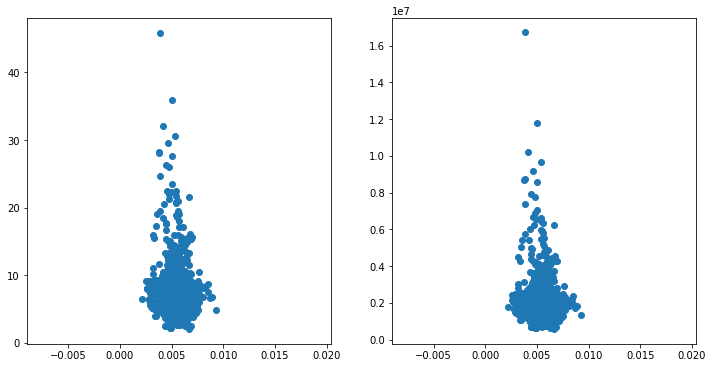

In [70]:

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax = axs[0]
ax.scatter(df['mCCC/CCC'].values, df['% Genome covered'].values)
ax = axs[1]
ax.scatter(df['mCCC/CCC'].values, df['Nonclonal reads'].values)
plt.show()


In [71]:
# move allc to allc trash

print(df.loc[df['mCCC/CCC'] > 0.02, 'Sample'].tolist())

df[df['mCCC/CCC']<0.02].set_index('Sample').to_csv(
    os.path.join(PATH_DATASETS, dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
    sep='\t', na_rep='NA', header=True, index=True)

# df[df['mCCC/CCC']<0.02].set_index('Sample').head()

# truncate mapping summary and copy that into right place

[]


In [9]:
# df.to_csv(os.path.join(path_dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
#                       sep='\t', na_rep='NA', header=True, index=False)

In [17]:
# with cd(path_dataset)
#     allc_files = sorted(glob.glob('./allc/allc_*.tsv.bgz'))
#     cells = [os.path.basename(allc_file)[len('allc_'): -len('.tsv.bgz')] for allc_file in allc_files]
# df_meta_dataset = df.set_index('Sample').loc[cells, :]

In [10]:
# print(df_meta_dataset.shape)

# df_meta_dataset.to_csv(os.path.join(path_dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
#                       sep='\t', na_rep='NA', header=True, index=True)
# df_meta_dataset.head()

## 

In [40]:
dataset = 'CEMBA_3F_180402'

f = '/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/{0}/mapping_summary_{0}.tsv'.format(dataset)
df_meta = pd.read_table(f)

df_meta.head()
cells_meta = df_meta['Sample'].values

cells_allc = [os.path.basename(allc_f)[5:-8]
    for allc_f in glob.glob('/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/{}/allc/*.tsv.bgz'.format(dataset))]

for cell in cells_allc:
    if cell not in cells_meta:
        print(cell)